In [181]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [182]:
#data
data = pd.read_csv('Ratings_data.csv')
data

,Unnamed: 0,Product_Review,Ratings
0,0,Evolve2 85 feels light and has adequate featur...,3.0 out of 5 stars
1,1,Edit 2: January 2021 the price shows these at ...,3.0 out of 5 stars
2,2,I bought this phone because it was rated highl...,3.0 out of 5 stars
3,3,The headset was comfortable even on long calls...,3.0 out of 5 stars
4,4,I wrote a lengthy word document comparing thes...,3.0 out of 5 stars
...,...,...,...
49995,49995,Please avoid buying this product. I brought to...,4.0 out of 5 stars
49996,49996,Writing this review after using the headphones...,5.0 out of 5 stars
49997,49997,First of all lets talk about its quality it is...,3.0 out of 5 stars
49998,49998,"Awesome product in under 1k, too loud to handl...",1.0 out of 5 stars


In [183]:
#unnamed: 0 being the unnecessary column
data.drop(['Unnamed: 0'], axis =1, inplace = True)

In [184]:
#shape of the data
data.shape

(50000, 2)

# DATA PRE-PROCESSING

In [185]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_Review  49600 non-null  object
 1   Ratings         47600 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [186]:
#description about the data
data.describe()

,Product_Review,Ratings
count,49600,47600
unique,219,23
top,the base is really good. it a value for this r...,5.0 out of 5 stars
freq,600,16760


In [187]:
#checking the null values
data.isnull().sum()

Product_Review     400
Ratings           2400
dtype: int64

In [188]:
#fetching only first three strings from the rating column
data['Ratings'] = data['Ratings'].str[:3]

In [189]:
#checking the value count of the ratings column
data['Ratings'].value_counts()

5.0    16760
1.0    11760
4.0     7210
3.0     3970
2.0     3200
iCl     1600
HiF      600
euf      400
Ter      200
Mao      200
Log      200
Lap      200
ICC      200
pTr      200
Ama      200
WK       200
iGR      200
SWA      200
(Re      100
Name: Ratings, dtype: int64

In [190]:
#dropping the unnecessary values in the rating column
data = data[(data.Ratings != 'iCl')]
data = data[(data.Ratings != 'HiF')]
data = data[(data.Ratings != 'euf')]
data = data[(data.Ratings != 'Ter')]
data = data[(data.Ratings != 'Mao')]
data = data[(data.Ratings != 'Log')]
data = data[(data.Ratings != 'Lap')]
data = data[(data.Ratings != 'ICC')]
data = data[(data.Ratings != 'WK ')]
data = data[(data.Ratings != 'pTr')]
data = data[(data.Ratings != 'Ama')]
data = data[(data.Ratings != 'WK')]
data = data[(data.Ratings != 'iGR')]
data = data[(data.Ratings != 'SWA')]
data = data[data.Ratings != '(Re']

In [191]:
#checking whether we have the desired values for the rating column
data['Ratings'].value_counts()

5.0    16760
1.0    11760
4.0     7210
3.0     3970
2.0     3200
Name: Ratings, dtype: int64

In [192]:
#converting the ratings into the float datatype from the object datatype
data.Ratings = data.Ratings.astype(float)

In [193]:
#We can write 'No review' in the rows where we have null value in the review column
data['Product_Review'].fillna('No review',inplace = True)

In [194]:
#calculating the average rating given by the users
average = data['Ratings'].mean()
average

3.3265734265734266

In [195]:
#Since the average is 3.3, so we replace the null values by 3.0
data['Ratings'].fillna(3.0,inplace=True)

In [196]:
#again checking the null values
data.isnull().sum()

Product_Review    0
Ratings           0
dtype: int64

In [197]:
#checking the shape again
data.shape

(45300, 2)

# DATA VISUALIZATION

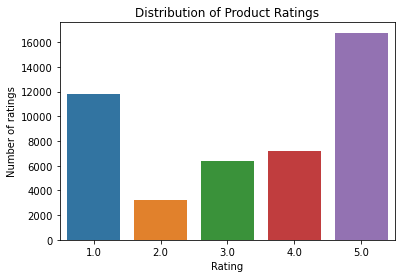

In [198]:
# f, axes = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=data['Ratings'])
ax.set(title="Distribution of Product Ratings", xlabel="Rating", ylabel="Number of ratings")
plt.show()

# PREPROCESSING USING NLP

In [199]:
#STEPS INVOLVED

#1. Removing punctuations and other special characters
#2. Splitting the comments into individual words
#3. Removing stop words
#4. Stemming and Lemmatising
#5. Applying count vectoriser
#6. Splitting the dataset into traning and testing 


In [200]:
pip install wordcloud

In [201]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [202]:
#importing required libraries
import re 
import string
import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

In [203]:
def clean_text(data, data_column_name):
    
    #Converting all messages to lowercase
    data[data_column_name] = data[data_column_name].str.lower()

    #Replace email addresses with 'email'
    data[data_column_name] = data[data_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    data[data_column_name] = data[data_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    data[data_column_name] = data[data_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    data[data_column_name] = data[data_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'               
    data[data_column_name] = data[data_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    data[data_column_name] = data[data_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    data[data_column_name] = data[data_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    data[data_column_name] = data[data_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    data[data_column_name] = data[data_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [204]:
#Calling the class
clean_text(data, 'Product_Review')
data['Product_Review'].head(5)

0    evolvenumbr numbr feels light adequate feature...
1    edit numbr january numbr price shows dollarsnu...
2    bought phone rated highly wirecutter pros good...
3    headset comfortable even long calls boom mic r...
4    wrote lengthy word document comparing jabra ev...
Name: Product_Review, dtype: object

In [205]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
data['Product_Review'] = data['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
data.head()

,Product_Review,Ratings
0,"[evolvenumbr, numbr, feels, light, adequate, f...",3.0
1,"[edit, numbr, january, numbr, price, shows, do...",3.0
2,"[bought, phone, rated, highly, wirecutter, pro...",3.0
3,"[headset, comfortable, even, long, calls, boom...",3.0
4,"[wrote, lengthy, word, document, comparing, ja...",3.0


In [206]:
pip install gensim‑2.3.0‑cp34‑cp34m‑win32.whl

Note: you may need to restart the kernel to use updated packages.


ERROR: gensim\u20112.3.0\u2011cp34\u2011cp34m\u2011win32.whl is not a valid wheel filename.


In [207]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [208]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [209]:
#Processing review with above Function
processed_review = []

for doc in data.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

45300


[['evolvenumbr',
  'numbr',
  'feel',
  'light',
  'adequ',
  'featur',
  'work',
  'claim',
  'hear',
  'constant',
  'complaint',
  'cut',
  'call',
  'audio',
  'output',
  'consist',
  'shame',
  'hefti',
  'price',
  'speak',
  'support',
  'tech',
  'team',
  'help',
  'either',
  'intend',
  'ever',
  'buy',
  'anoth',
  'jabra',
  'product'],
 ['edit',
  'numbr',
  'januari',
  'numbr',
  'price',
  'show',
  'dollarsnumbr',
  'price',
  'would',
  'say',
  'would',
  'consider',
  'purchas',
  'still',
  'meh',
  'qualiti',
  'encourag',
  'comparison',
  'headset',
  'dollarsnumbr',
  'signific',
  'better',
  'price',
  'point',
  'dollarsnumbr',
  'buy',
  'price',
  'dollarsnumbr',
  'strong',
  'encourag',
  'spend',
  'money',
  'better',
  'headset',
  'dollarsnumbr',
  'make',
  'contend',
  'edit',
  'headset',
  'numbr',
  'month',
  'see',
  'price',
  'drop',
  'dollarsnumbr',
  'echo',
  'review',
  'would',
  'strong',
  'encourag',
  'consid',
  'differ',
  'hea

In [210]:
data['clean_review']=processed_review  #Assigning this to the dataframe
data.head()

,Product_Review,Ratings,clean_review
0,"[evolvenumbr, numbr, feels, light, adequate, f...",3.0,"[evolvenumbr, numbr, feel, light, adequ, featu..."
1,"[edit, numbr, january, numbr, price, shows, do...",3.0,"[edit, numbr, januari, numbr, price, show, dol..."
2,"[bought, phone, rated, highly, wirecutter, pro...",3.0,"[buy, phone, rat, high, wirecutt, pros, good, ..."
3,"[headset, comfortable, even, long, calls, boom...",3.0,"[headset, comfort, even, long, call, boom, mic..."
4,"[wrote, lengthy, word, document, comparing, ja...",3.0,"[write, lengthi, word, document, compar, jabra..."


In [211]:
data['Product_Review'] = data['clean_review'].apply(lambda x:' '.join(y for y in x))
data.head()

,Product_Review,Ratings,clean_review
0,evolvenumbr numbr feel light adequ featur work...,3.0,"[evolvenumbr, numbr, feel, light, adequ, featu..."
1,edit numbr januari numbr price show dollarsnum...,3.0,"[edit, numbr, januari, numbr, price, show, dol..."
2,buy phone rat high wirecutt pros good sound qu...,3.0,"[buy, phone, rat, high, wirecutt, pros, good, ..."
3,headset comfort even long call boom mic rigid ...,3.0,"[headset, comfort, even, long, call, boom, mic..."
4,write lengthi word document compar jabra evolv...,3.0,"[write, lengthi, word, document, compar, jabra..."


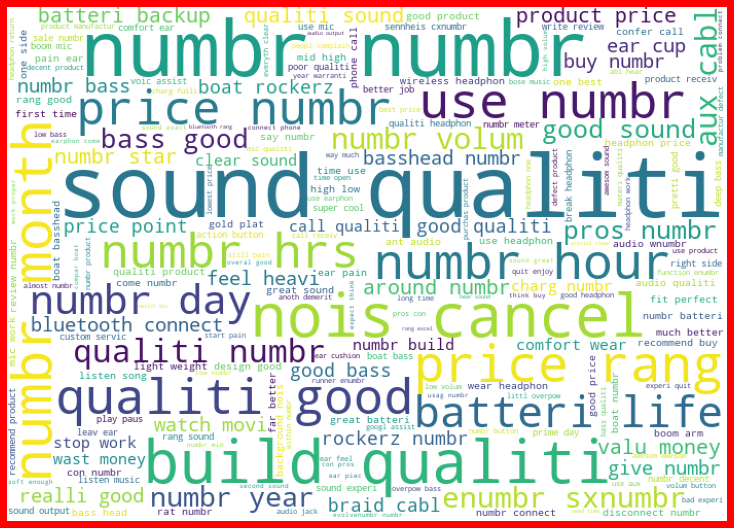

In [212]:
#Getting sense of words in Rating 1
one = data['Product_Review'][data['Ratings']==1.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

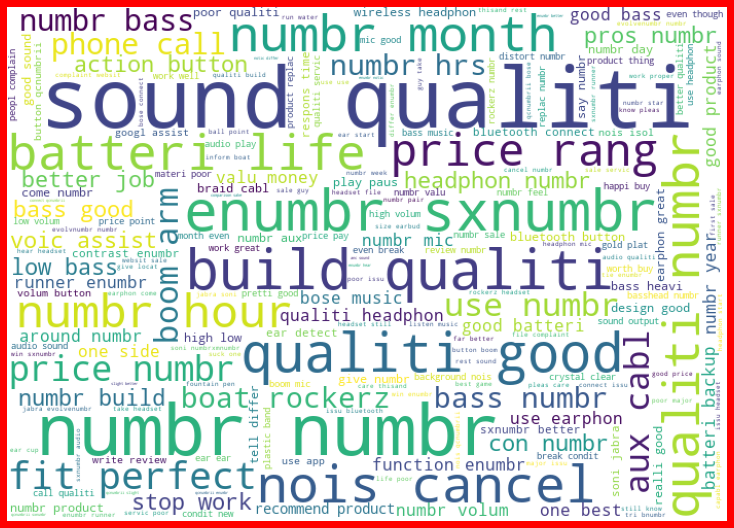

In [213]:
#Getting sense of words in Rating 2
one = data['Product_Review'][data['Ratings']==2.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

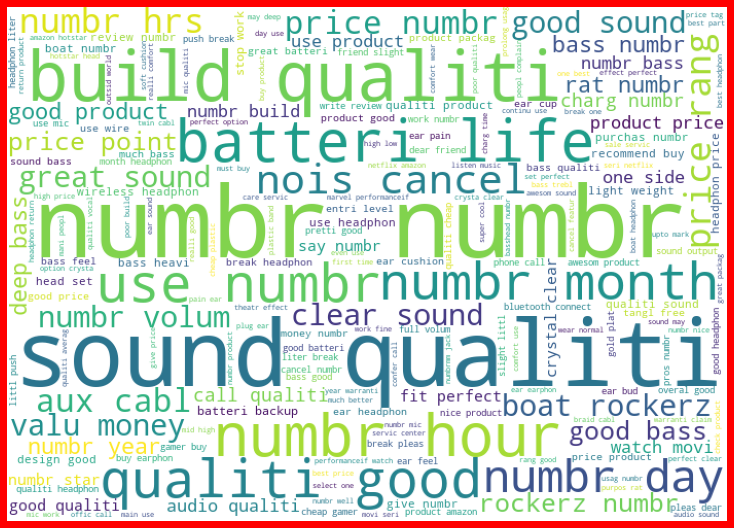

In [214]:
#Getting sense of words in Rating 3
one = data['Product_Review'][data['Ratings']==3.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

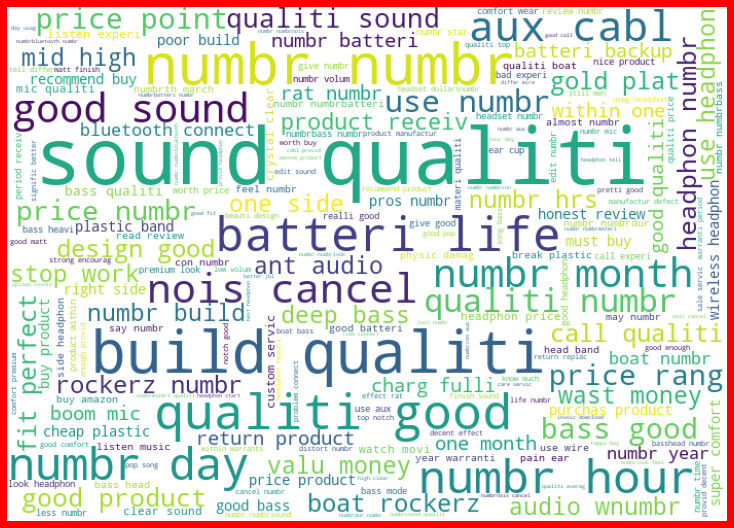

In [215]:
#Getting sense of words in Rating 4
one = data['Product_Review'][data['Ratings']==4.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

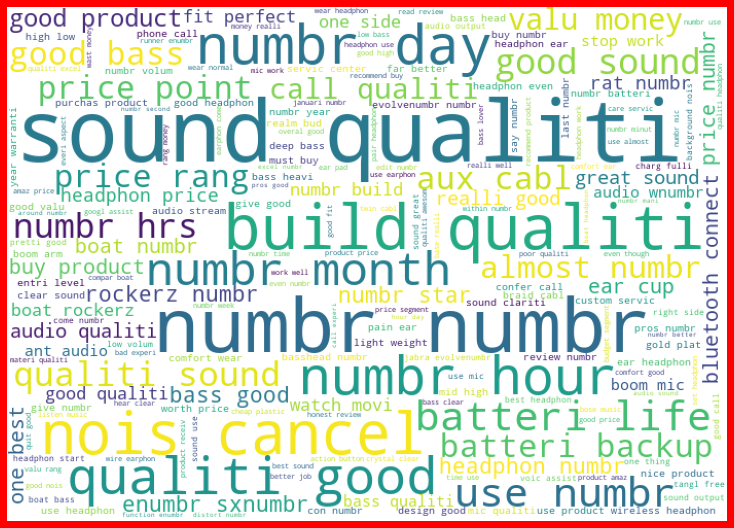

In [216]:
#Getting sense of words in Rating 5
one = data['Product_Review'][data['Ratings']==5.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# FEATURE EXTRACTION

In [217]:
#Converting text into numeric using TfidfVectorizer
#create object
tf = TfidfVectorizer()

#fitting 
features = tf.fit_transform(data['Product_Review'])
x=features
y=data[['Ratings']]

In [218]:
x.shape

(45300, 2276)

In [219]:
y.shape

(45300, 1)

# MODEL BUILDING

In [220]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [221]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(x_train,y_train)
        pred=reg.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [222]:
LR=LogisticRegression()
max_acc_score(LR,x,y)

The accuracy score at r_state 42 is 0.47671081677704197
The accuracy score at r_state 43 is 0.47880794701986756
The accuracy score at r_state 44 is 0.4749448123620309
The accuracy score at r_state 45 is 0.47991169977924947
The accuracy score at r_state 46 is 0.482560706401766
The accuracy score at r_state 47 is 0.47373068432671084
The accuracy score at r_state 48 is 0.473841059602649
The accuracy score at r_state 49 is 0.4803532008830022
The accuracy score at r_state 50 is 0.47770419426048566
The accuracy score at r_state 51 is 0.46799116997792495
The accuracy score at r_state 52 is 0.4714128035320088
The accuracy score at r_state 53 is 0.4741721854304636
The accuracy score at r_state 54 is 0.47759381898454745
The accuracy score at r_state 55 is 0.47770419426048566
The accuracy score at r_state 56 is 0.47549668874172185
The accuracy score at r_state 57 is 0.4778145695364238
The accuracy score at r_state 58 is 0.469205298013245
The accuracy score at r_state 59 is 0.4760485651214128
The 

0.48399558498896245

In [223]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84,test_size=.20)

# FINDING OUT THE BEST MODEL

In [224]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [225]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [226]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [227]:
#Importing required modules and metrices
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [228]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n\n\n')

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.48399558498896245


cross_val_score:  0.2862913907284768


Classification report:
 
              precision    recall  f1-score   support

         1.0       0.46      0.52      0.49      2361
         2.0       0.48      0.16      0.24       680
         3.0       0.41      0.17      0.24      1222
         4.0       0.41      0.26      0.32      1415
         5.0       0.52      0.73      0.61      3382

    accuracy                           0.48      9060
   macro avg       0.46      0.37      0.38      9060
weighted avg       0.47      0.48      0.45      9060



Confusion matrix: 

[[1233   49   96  153  830]
 [ 253  110    2   93  222]
 [ 340   15  205   92  570]
 [ 269   22   62  361  701]
 [ 567   33  131  175 2476]]




****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.46357615894039733


cross

In [229]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,Logistic Regression,48.399558,28.629139
1,MultinomialNB,46.357616,24.852097
2,DecisionTreeClassifier,48.730684,27.474614
3,KNeighborsClassifier,37.649007,23.247241
4,RandomForestClassifier,48.785872,27.785872
5,AdaBoostClassifier,39.867550,31.863135
6,GradientBoostingClassifier,47.461369,29.578366


# HYPERPARAMETER TUNING

In [233]:
#HYPERPARAMETER TUNING:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators' : [10,50,70],
    'learning_rate' : [1,2,3,4,5],
    'algorithm' : ['SAMME', 'SAMME.R'],
    'random_state' : range(20,25)
}

In [234]:
#Applying grid search CV
grid = GridSearchCV(AdaBoostClassifier(), param_grid = grid_param)

In [235]:
#Training the model
grid.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 70],
                         'random_state': range(20, 25)})

In [237]:
#The best parameters
best_parameters = grid.best_params_
print(best_parameters)

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 70, 'random_state': 20}


In [238]:
#FINAL MODEL
#Substituting the best parameters in the AdaBoostClassifier:

AB = AdaBoostClassifier(learning_rate = 1, algorithm = 'SAMME.R', n_estimators = 70, random_state = 20)

AB.fit(x_train, y_train)
AB.score(x_test,y_test)

0.40496688741721854

In [239]:
#SAVING THE MODEL:

import joblib
joblib.dump(AB, 'Ratings_prediction_final_model.pkl')

['Ratings_prediction_final_model.pkl']